In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
data = pd.read_csv('Walmart DataSet.csv',parse_dates=['Date'])

<ipython-input-29-050b15784b27>:7: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



 Exploratory Data Analysis (EDA) and Insights:

Check Data Sumary and Quality:
Examine basic statistics, missing values, and data types.
Ensure data integrity and cleanliness.

In [30]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [31]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.00

#Analyze Sales Trends:
#Identify overall sales trends and patterns over time.
#Check for seasonality and any apparent correlation with holidays.

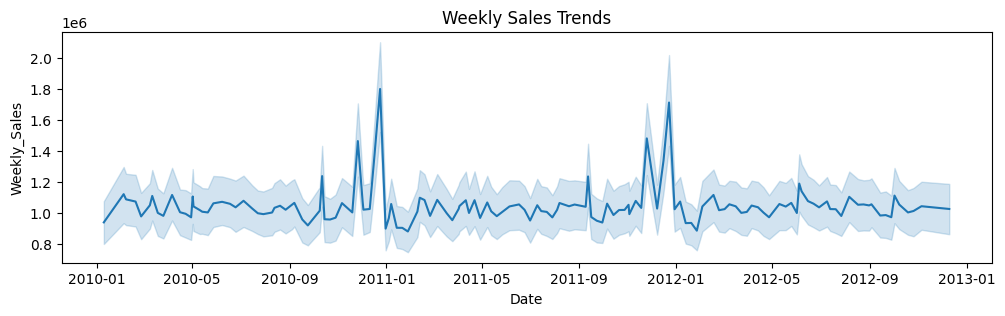

In [32]:
plt.figure(figsize=(12, 3))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Trends')
plt.show()


# Create 'Day_of_Week' and 'Month' columns


In [33]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year



In [34]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_of_Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


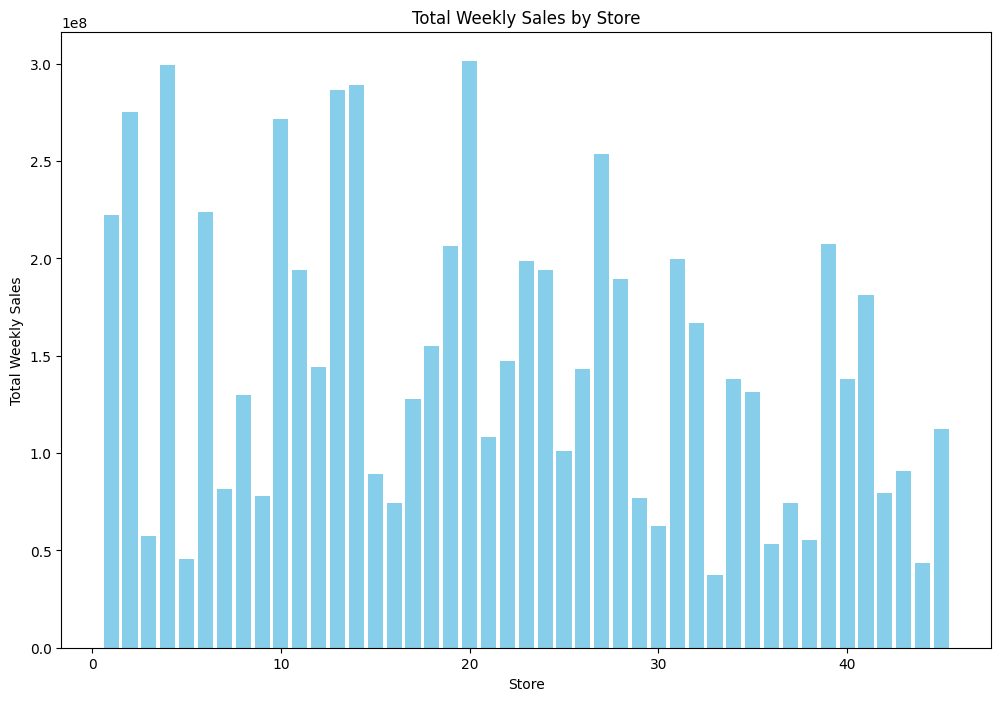

In [35]:
# Group by store and sum the weekly sales
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(total_sales_by_store['Store'], total_sales_by_store['Weekly_Sales'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Store')
plt.show()

# Explore relationships with other features


In [36]:
storecount = data['Store'].nunique()
storecount

45

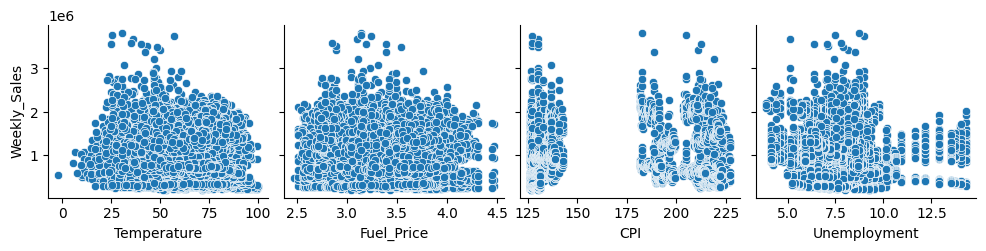

In [37]:
sns.pairplot(data, x_vars=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], y_vars='Weekly_Sales', kind='scatter')
plt.show()


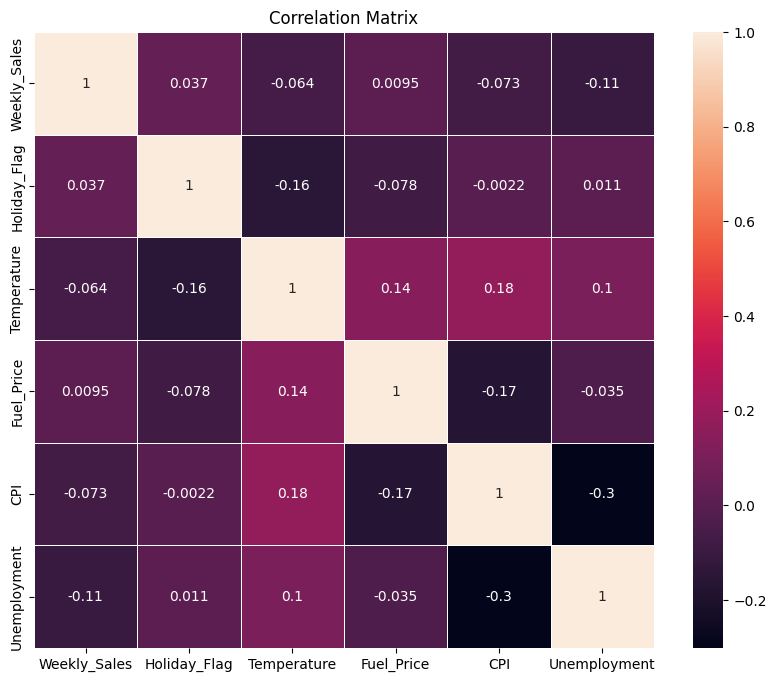

In [38]:
# Select numerical columns for correlation matrix
numerical_columns = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


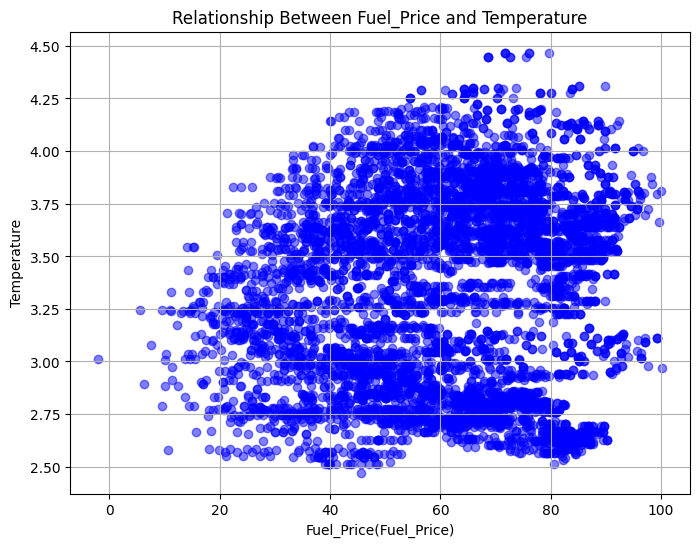

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['Fuel_Price'], alpha=0.5, color='blue')
plt.title('Relationship Between Fuel_Price and Temperature')
plt.xlabel('Fuel_Price(Fuel_Price)')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [40]:
storedata = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
storedata.head(10)

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


## **TOP 20 stores with the highest sales**

We get the know stores that have done high sales and store which are not doing great so we need more products to stack up at the stores with high sales

In [41]:
top20 = storedata.sort_values(by='Weekly_Sales', ascending=False)
top20

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


#Model Building and Forecasting

Forecast Future Sales:
Extend the dataset for future weeks and make predictions. Using Fb Prophot for Future sales forcasting

In [42]:
pip install prophet

In [43]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_of_Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [44]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from prophet.plot import plot_plotly , plot_components_plotly

In [45]:
Futurperd=data.groupby('Date').sum()['Weekly_Sales'].reset_index()
Futurperd.head()

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [46]:
Futurperd.columns = ['ds','y']
Futurperd['ds'] = pd.to_datetime(Futurperd['ds'])
Futurperd.tail()

,ds,y
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99
142,2012-12-10,46128514.25


In [47]:
m = Prophet(interval_width = 0.95)
m.fit(Futurperd)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6aynsipb/ey47fpzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6aynsipb/ml1qkfes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50768', 'data', 'file=/tmp/tmp6aynsipb/ey47fpzr.json', 'init=/tmp/tmp6aynsipb/ml1qkfes.json', 'output', 'file=/tmp/tmp6aynsipb/prophet_modelwxu1y9f7/prophet_model-20240202081514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=12,freq='W')
future.tail(5)

,ds
150,2013-02-03
151,2013-02-10
152,2013-02-17
153,2013-02-24
154,2013-03-03


In [49]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-12-16,6.147493e+07,5.335745e+07,6.939003e+07
144,2012-12-23,6.372957e+07,5.556657e+07,7.158706e+07
145,2012-12-30,5.847966e+07,5.028108e+07,6.643763e+07
146,2013-01-06,4.833062e+07,4.068226e+07,5.631678e+07
147,2013-01-13,4.052127e+07,3.271437e+07,4.812817e+07
148,2013-01-20,4.003263e+07,3.240640e+07,4.780308e+07
149,2013-01-27,4.524289e+07,3.763133e+07,5.311510e+07
150,2013-02-03,5.039990e+07,4.244905e+07,5.821252e+07
151,2013-02-10,5.162450e+07,4.404749e+07,5.960798e+07
152,2013-02-17,4.985128e+07,4.214783e+07,5.765928e+07


In [50]:
plot_plotly(m,forecast)

In [51]:
plot_components_plotly(m,forecast)

# Evaluation Metrics: Mean Absolute Percentage Error (MAPE).

In [52]:
y_true = Futurperd['y'].values
y_pred = forecast['yhat'].iloc[:-12]# -12 weeks not to be taken in the y_pred

mape = mean_absolute_error(y_true, y_pred) / abs(y_true).mean() * 100

print(f'MAPE: {mape}%')


MAPE: 5.076384875440434%


#To find the 12 week prediction for each unique Store we need to iterate the no of store in a loop and fit it into model.
# Group by store and train separate models for each store


In [53]:
import plotly.offline as pyo

In [54]:
# making two dataframes for the prophet function prophet_data & Unique_stores
prophet_data = data[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

unique_stores = data['Store'].unique()


In [55]:
# Initialize an empty DataFrame to store the forecast results for all store
forecast_df = pd.DataFrame()

# We need to loop through each unique store and train a Prophet model
for store in unique_stores:
    store_data = prophet_data[data['Store'] == store]

    model = Prophet(yearly_seasonality=True)
    model.fit(store_data)

    future = model.make_future_dataframe(periods=12, freq='W')    # Create a dataframe with future dates for prediction
    forecast = model.predict(future)    # Make predictions for the future dates

 # Extracting relevant columns from the forecast
    forecast_store = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': f'Store_{store}_Sales'})

 # Appendind  the forecast results to the overall DataFrame
    forecast_df = pd.concat([forecast_df, forecast_store], axis=1)

 # Ploting using plotly's plot_plotly function for the current store
    fig = plot_plotly(model, forecast)

    #fig_components = plot_components_plotly(model, forecast)

    # Save the interactive plot to an HTML file
    pyo.plot(fig, filename=f'prophet_forecast_store_{store}.html')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6aynsipb/g723ztz1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6aynsipb/l8n67l1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9822', 'data', 'file=/tmp/tmp6aynsipb/g723ztz1.json', 'init=/tmp/tmp6aynsipb/l8n67l1v.json', 'output', 'file=/tmp/tmp6aynsipb/prophet_modelbc7245y5/prophet_model-20240202081515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ay

# **To see the Prediction for 12 weeks for any specific store replace the no with the actual store number.**
File will get downoaded into a html file

In [56]:
from google.colab import files

files.download(f'prophet_forecast_store_{1}.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>